In [1]:
import numpy as np
import csv
import pickle
from math import floor, log10

dat_file = "../analysis/j1429/0_1d_spectra_29.36-3x3-4864-4914/z_2.1812/Spectrum_Analysis_z_2.1812_Measurement_Table.dat"
pickle_file = "../analysis/j1429/0_1d_spectra_29.36-3x3-4864-4914/z_2.1812/Spectrum_Analysis_z_2.1812.p"

In [2]:
# load the dat file
ions = {}

with open(dat_file, newline='') as csvfile:
    datfilereader = csv.reader(csvfile, delimiter=' ', quotechar='"')
    for rownum,row in enumerate(datfilereader):
        if rownum == 0: continue
        print(f"row[0]: {row}")
        name = row[0]
        # print(f"name: {name}")
        ions[name] = {
            "ew": row[1],
            "ew_sig": row[2],
            "vmin": row[3],
            "vmax": row[4],
            "N": row[5],
            "N_sig": row[6],
            "vel": row[7],
        }
        # ions[name] = ion
        
for ion_name in ions:
    print(f"{ion_name}:")
    for meas in ions[ion_name]:
        print(f"    {meas}: {ions[ion_name][meas]}")


row[0]: ['SiIII 1206', '973.79', '1888.3', '-226.47', '292.65', '13.9', '14.34', '-12.38']
row[0]: ['NV 1238', '751.5', '3733.54', '-242.95', '704.66', '14.65', '15.35', '47.57']
row[0]: ['NV 1242', '637.3', '2683.16', '-275.91', '350.33', '15.0', '15.56', '-52.21']
row[0]: ['SiII 1304', '251.72', '2517.25', '-121.25', '212.08', '14.32', '15.33', '16.71']
row[0]: ['CII 1334', '748.05', '2187.17', '-159.5', '343.22', '14.77', '15.25', '35.18']
row[0]: ['SiIV 1393', '424.34', '1892.79', '-197.75', '173.83', '13.76', '14.45', '-3.37']
row[0]: ['SiIV 1402', '172.69', '2772.65', '-159.5', '430.65', '13.65', '14.83', '102.68']
row[0]: ['SiII 1526', '702.63', '2126.13', '-137.64', '408.79', '14.63', '15.11', '28.57']
row[0]: ['CIV 1548', '728.59', '2145.28', '-236.0', '304.97', '14.39', '14.88', '-4.83']
row[0]: ['CIV 1550', '275.42', '2263.39', '-181.35', '277.65', '14.2', '15.1', '10.18']
row[0]: ['FeII 1608', '644.05', '1972.76', '-181.35', '321.36', '14.8', '15.31', '23.19']
row[0]: ['AlI

In [3]:
# load the pickle file
with open(pickle_file,'rb') as pklfile:  absys=pickle.load(pklfile)

# the keys are just the name of the absys (eg. )"SiIII 1206")
keys = absys.keys()
# for key in keys:
#     print(f"key: {key}")
    
sample_key = list(keys)[0]
print(f"Absorber: {sample_key} --- ")

# the abs_keys are all of the measurements for that ion
abs_keys = absys[sample_key].keys()
for abs_key in sorted(abs_keys):
    print(f"   {abs_key} ::: {absys[sample_key][abs_key]}")

Absorber: SiIII 1206 --- 
   EW ::: 973.7936643673362
   EW_text ::: Text(0.05, 0.85, '974 $\\pm$ 1888 m$\\AA$')
   EWlims ::: [-226.4712767451656, 292.65415047520946]
   EWsig ::: 1888.304983357748
   N ::: 80350336540234.34
   Nsig ::: 221002261313299.28
   cont ::: [0.06777071 0.06657596 0.06539457 0.0642271  0.06307406 0.06193601
 0.06081347 0.05970698 0.05861709 0.05754432 0.05648921 0.0554523
 0.05443412 0.05343522 0.05245612 0.05149737 0.0505595  0.04964304
 0.04874854 0.04787653 0.04702754 0.04620212 0.0454008  0.04462411
 0.04387259 0.04314679 0.04244722 0.04177444 0.04112898 0.04051137
 0.03992215 0.03936186 0.03883103 0.0383302  0.03785991 0.03742069
 0.03701308 0.03663762 0.03629484 0.03598527 0.03570947 0.03546795
 0.03526126 0.03508993 0.03495451 0.03485552 0.03479351 0.034769
 0.03478255 0.03483467 0.03492592]
   error ::: [0.18891169 0.18323377 0.16906512 0.15204033 0.14355117 0.15567504
 0.16789864 0.1722099  0.16364075 0.17090176 0.16902372 0.16434471
 0.17016934 0.17

In [4]:
# pull the juicy bits for one ion from the pickle fil

vel = absys[sample_key]['vel']
x_lim = absys[sample_key]['window_lim']
wave  = absys[sample_key]['wave']
ew_lims = absys[sample_key]['EWlims']
flux = absys[sample_key]['flux']
y_error = absys[sample_key]['error']
cont = absys[sample_key]['cont']
name = absys[sample_key]['name']
zabs = absys[sample_key]['z']

In [5]:
# a couple of helper functions
def sig_figs(x: float, precision: int = 6):
    """
    Rounds a number to number of significant figures
    Parameters:
    - x - the number to be rounded
    - precision (integer) - the number of significant figures
    Returns:
    - float
    """

    x = float(x)
    precision = int(precision)

    return round(x, -int(floor(log10(abs(x)))) + (precision - 1))

def show_lr(label, arr, lndx, rndx):
    print(f"{label} from: ({sig_figs(arr[lndx-1],6)}, {sig_figs(arr[lndx])})  to ({sig_figs(arr[rndx-1])}, {sig_figs(arr[rndx],6)})")

In [6]:
# get some visibility into the structure of the limits

# the ewlim are defined in terms of the velocity
x1_index = np.where(vel >= ew_lims[0])[0][0] # the x index where the velocity is greater than the lower limit
x2_index = np.where(vel >= ew_lims[1])[0][0] # the x index where the velocity is greater than the upper limit

print(f"x1_index: {x1_index}      x2_index: {x2_index}")
print(f"ew_lims: {ew_lims}")
show_lr("vel", vel, x1_index, x2_index)
# print("- "*20)

# NOTE: this craziness to interpolate betwee the 2 real points isn't needed because we'll end up doing a fit and can be approximate here.
# calc percentage distance of ew_lims[0] between vel[x1_index-1] and vel[x1_index]
# left_factor = (ew_lims[0]-vel[x1_index-1])/(vel[x1_index]-vel[x1_index-1])
# print(f"{ew_lims[0]} is {sig_figs(left_factor, 4)} between {vel[x1_index-1]} and {vel[x1_index]}")
# # print("ew_lims[0] is {:0} between {:1} and {:2}".format(left_factor:.5f, vel[x1_index-1], vel[x1_index]))
# right_factor = (ew_lims[1]-vel[x2_index-1])/(vel[x2_index]-vel[x2_index-1])
# print(f"{ew_lims[1]} is {sig_figs(right_factor, 4)} between {vel[x2_index-1]} and {vel[x2_index]}")

print("- "*20)
show_lr("wave", wave, x1_index, x2_index)
show_lr("flux", flux, x1_index, x2_index)
show_lr("cont", cont, x1_index, x2_index)



x1_index: 23      x2_index: 29
ew_lims: [-226.4712767451656, 292.65415047520946]
vel from: (-236.673, -158.543)  to (232.105, 310.234)
- - - - - - - - - - - - - - - - - - - - 
wave from: (3835.09, 3836.09)  to (3841.09, 3842.09)
flux from: (0.0416401, 0.0357488)  to (0.03477, 0.043992)
cont from: (0.0454008, 0.0446241)  to (0.041129, 0.0405114)


In [7]:
# Prepare the data: Choose how you want to do the analysis, and set the analysis range/limits
use_vel = False
if use_vel:
    print('Using velocity')
    adj = 0
    xdata = vel
    ewlims = [ew_lims[0]-adj, ew_lims[1]+adj]
    wlims = [-2000,2000]
else: 
    print('Using wavelength')
    xdata = wave
    ewlims = [wave[x1_index-1],wave[x2_index+1]]
    wlims = [wave[x1_index-20],wave[x2_index+20]]

# normalize the flux and error to the continuum
nflux = flux/cont
nerror = y_error/cont

print(f"ewlims = {ewlims}")
ewlims_rest = [ewlims[0]/(1. + zabs),ewlims[1]/(1. + zabs)]
print(f"ewlims-obs: {ewlims}")
print(f"ewlims_rest: {ewlims_rest}")

delwv  = np.double(ewlims[1])-np.double(ewlims[0])
delwv_rest  = np.double(ewlims_rest[1])-np.double(ewlims_rest[0])
print(f"delwv = {delwv}   delvw_rest = {delwv_rest}")  

# to limit the influence of points away from the signal of interest, we limit the analysis range
wingspan = delwv / 2.0
wingspan_rest = delwv_rest / 2.0

new_limits = (xdata >= ewlims[0]-wingspan) & (xdata <= ewlims[1]+wingspan)
gxdata = xdata[new_limits]
gxdata_rest = gxdata/(1. + zabs)
print(f"gxdata-obs: {gxdata}")
print(f"gxdata-rest: {gxdata_rest}")

gnflux = nflux[new_limits]
gnerror = nerror[new_limits]
print(f"limiting fit analysis range to {ewlims[0]-delwv}, {ewlims[1]+delwv}")

Using wavelength
ewlims = [3835.0877784050017, 3843.089858978357]
ewlims-obs: [3835.0877784050017, 3843.089858978357]
ewlims_rest: [1205.5475224459328, 1208.0629507664896]
delwv = 8.002080573355215   delvw_rest = 2.5154283205567936
gxdata-obs: [3831.08673831 3832.08699832 3833.08725834 3834.08751837 3835.08777841
 3836.08803845 3837.0882985  3838.08855856 3839.08881863 3840.0890787
 3841.08933879 3842.08959888 3843.08985898 3844.09011909 3845.0903792
 3846.09063932]
gxdata-rest: [1204.28980835 1204.60423687 1204.91866539 1205.23309392 1205.54752245
 1205.86195098 1206.17637951 1206.49080805 1206.80523659 1207.11966513
 1207.43409367 1207.74852222 1208.06295077 1208.37737932 1208.69180787
 1209.00623643]
limiting fit analysis range to 3827.0856978316465, 3851.091939551712


In [8]:
import os, sys
base = '/Users/robertseaton/School/github_repos/CGM-learning/code'
if base not in sys.path:
    sys.path.insert(0, os.path.abspath(base))
from bobutils import data_analysis as da

# all fitting & calculations are done from the rest frame
g, fit_g = da.create_gaussian_fitter(gxdata_rest, gnflux, ewlims_rest)
EW_orig, EW_orig_sig = da.calculate_ew_original(g, gxdata_rest, fit_g)
EW_orig = 1000 * EW_orig # convert to mAngstroms
EW_gauss = da.calculate_ew_from_gaussian(g, ewlims_rest)
EW_gauss = 1000 * EW_gauss # convert to mAngstroms

height = np.abs(g.parameters[1]) # absolute value of the amplitude of the gaussian
width = np.double(ewlims[1])-np.double(ewlims[0])

simple_area = .5 * width * height
print(f"simple_area: {simple_area}")
ion_name = "SiIII 1206"
print(f"From ions:  EW: {ions[ion_name]['ew']}    EWsig: {ions[ion_name]['ew_sig']}")
print(f"Using alg adapted from linetools: EW: {EW_orig}    EWsig: {EW_orig_sig}")
print(f"Using guassian fit: EW: {EW_gauss}")


Inside calculate_ew_original  ----- 
      amplitude: 0.8957937376523186
         stddev: 0.4489890543287398
simple_area: 3.5841068329004386
From ions:  EW: 973.79    EWsig: 1888.3
Using alg adapted from linetools: EW: 1008.1698604053935    EWsig: 0.12306232078570037
Using guassian fit: EW: 1517.8709869862544


In [11]:
# draws a trignle to show the area under the curve
# -------------------------------------
amp0 = g.parameters[0] # continuum line
amp1 = g.parameters[1] # amplitude of the gaussian
mean1 = g.parameters[2] # mean of the gaussian
std1 = g.parameters[3] # stddev of the gaussian
# pt1 = [mean1-3*std1, amp0]
# pt2 = [mean1+3*std1, amp0]
# pt3 = [mean1, amp0+amp1]
# base = 6 * std1
# height = np.abs(amp1)
# print(f"Area: .5 * base: {base}  *  height: {height}  = {.5*base*height}")

# pts = np.array([pt1, pt2, pt3, pt1])
# ax1.plot(pt1[0], pt1[1], marker = 'o', color="k")
# ax1.plot(pt2[0], pt2[1], marker = 'o', color="k")
# ax1.plot(pt3[0], pt3[1], marker = 'o', color="k")

# ax1.plot(pts[:,0],pts[:,1], color="k", linestyle="dashed",linewidth=1.0, alpha=.7)
# ax1.fill(pts[:,0],pts[:,1], color = 'c', alpha=.4)
# -------------------------------------


Area: .5 * base: 2.693934325972439  *  height: 0.8957937376523186  = 1.2066047494263654


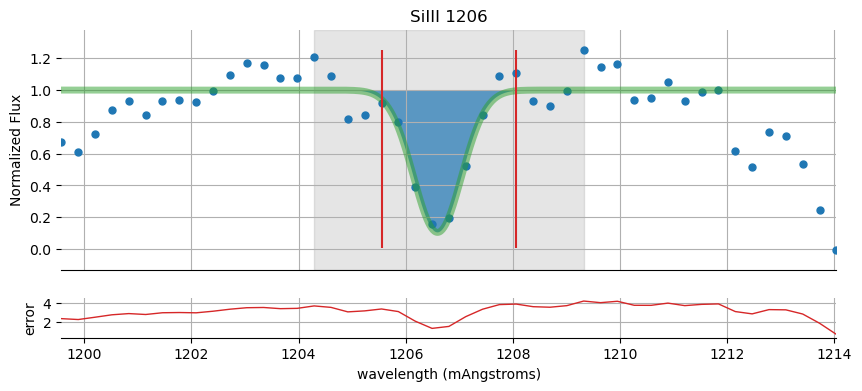

In [10]:
# Now plot it!
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# plt.rcParams['text.usetex'] = True

red_correct = 1.0/(1.0 + zabs)
fig = plt.figure(figsize=(10, 4))
wlims_rest = [wlims[0]/(1. + zabs),wlims[1]/(1. + zabs)]
fit_xdata = np.linspace(wlims_rest[0], wlims_rest[1], 1000) # just gives the fit a smooth look
gs = GridSpec(2, 1, height_ratios=[6, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax1.axvspan(ewlims_rest[0]-wingspan*red_correct, ewlims_rest[1]+wingspan*red_correct, alpha=0.2, color='tab:gray')
ax1.plot(xdata*red_correct, nflux, 'o', color="tab:blue", label="flux", linewidth=1.0, markersize=5)
ax1.plot(fit_xdata, g(fit_xdata), 
         '-', 
         color="tab:green", 
         linewidth=5.0, alpha=0.5,
         markersize=5)
continuum = g.parameters[0]

ax1.fill_between(fit_xdata, continuum, g(fit_xdata), alpha=0.7)

flux_max = np.max(np.abs(nflux))
flux_min = np.min(np.abs(nflux))

ax1.vlines(ewlims_rest, flux_min, flux_max, color="tab:red") 

ax1.set_xlim(wlims_rest)
ax1.set_ylabel('Normalized Flux')
ax1.grid(True)
ax1.set_title(name)

ax1.spines[["left", "top", "right"]].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.margins(y=0.1)

if use_vel:
    ax2.set_xlabel('velocity (km/s)')
else:
    ax2.set_xlabel('wavelength (mAngstroms)')
ax2.plot(xdata*red_correct, nerror, color="tab:red", label="flux", ms=4, linewidth=1.0, alpha=1)
ax2.spines[["left", "top", "right"]].set_visible(False)
ax2.set_ylabel('error')
ax2.grid(True)
ax2.margins(y=0.1)
